**Seeding for reproducibility**

In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing dependencies**

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


**Data Curation**

Upload the kaggle json file

In [3]:
# Open the JSON file in read mode
with open("kaggle.json", "r") as f:
    kaggle_credentials = json.load(f)  # Load JSON data from the file

# Setup Kaggle API Key as environment variable
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [4]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!ls

 drive			 plantvillage-dataset.zip	 test_tomato-early-blight.jpg
 kaggle.json		 sample_data
'plantvillage dataset'	 test2_tomato-early-blight.jpg


In [6]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", "r") as zip_ref:
    zip_ref.extractall()


In [7]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:2])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:3])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:2])


['grayscale', 'color', 'segmented']
38
['Cherry_(including_sour)___healthy', 'Grape___Black_rot']
38
['Cherry_(including_sour)___healthy', 'Grape___Black_rot', 'Strawberry___Leaf_scorch']
38
['Cherry_(including_sour)___healthy', 'Grape___Black_rot']


**Number of classes = 38**

In [8]:
print(len(os.listdir("plantvillage dataset/color/Tomato___Early_blight")))
print(os.listdir("plantvillage dataset/color/Tomato___Early_blight"))


1000
['b0bc0b85-fce9-43cc-87d1-481d4a107b5c___RS_Erly.B 9451.JPG', '4d007f46-814a-4cec-93d4-0be4b32a9ed6___RS_Erly.B 6495.JPG', '860f1131-a11c-4e17-aaec-c7b96ba914f0___RS_Erly.B 6669.JPG', '680b86dc-14e0-4668-95c8-776193015146___RS_Erly.B 7854.JPG', '0cd1ebaf-3975-4749-b625-50b7b0751c36___RS_Erly.B 7508.JPG', '1bb0101c-d0a4-41a5-85b9-6e8634d01a36___RS_Erly.B 9585.JPG', '8c9b351b-520c-46f9-960f-8850386e54ab___RS_Erly.B 7677.JPG', '757b49d0-db8e-4352-820a-9f0bdb7d2657___RS_Erly.B 7748.JPG', 'cd2d8a7b-2389-4a2c-8647-b986092fa506___RS_Erly.B 8377.JPG', '4cbe4896-66b5-4834-8eb7-5baf49ed2f7d___RS_Erly.B 8354.JPG', '52232f20-1d2d-4545-9a5c-76ed0f608bd2___RS_Erly.B 6445.JPG', 'afc527c5-c9b2-478b-8df0-ff66767191df___RS_Erly.B 7473.JPG', '8a13da5b-4bc2-485a-962d-df8c6634ea00___RS_Erly.B 7519.JPG', 'c8dd6713-727e-4811-b951-e70e44d0c483___RS_Erly.B 7817.JPG', 'f33995ae-6456-476c-b832-4ff4cbaf49f7___RS_Erly.B 7525.JPG', '48160d05-d3e5-44bb-810e-18d08407b529___RS_Erly.B 9606.JPG', 'de96e7a2-6de3-469

**Data Preprocessing**

In [9]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

In [10]:
import os
import shutil

# Dataset Path
base_dir = 'plantvillage dataset/color'

# List all directories in the base directory
all_directories = os.listdir(base_dir)

# Filter directories that do not start with 'Tomato'
non_tomato_directories = [d for d in all_directories if not d.startswith('Tomato')]

# Remove non-tomato directories
for dir_name in non_tomato_directories:
    dir_path = os.path.join(base_dir, dir_name)
    shutil.rmtree(dir_path)
    #print(f"Removed {dir_name} from {base_dir}")

# Final list of directories in the base directory
final_directories = os.listdir(base_dir)
print("Final directories in base_dir:")
for directory in final_directories:
    print(directory)


Final directories in base_dir:
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Septoria_leaf_spot
Tomato___Target_Spot
Tomato___Late_blight
Tomato___Tomato_mosaic_virus
Tomato___Early_blight
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___healthy
Tomato___Bacterial_spot
Tomato___Leaf_Mold


(256, 256, 3)


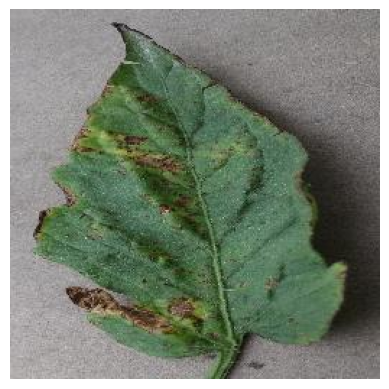

In [11]:
image_path = '/content/plantvillage dataset/color/Tomato___Bacterial_spot/00728f4d-83a0-49f1-87f8-374646fcda05___GCREC_Bact.Sp 6326.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off') # Turn off axis numbers
plt.show()

In [12]:
# Image Parameters
img_size = 224
batch_size = 32

In [13]:
image_path = '/content/plantvillage dataset/color/Tomato___Late_blight/005a2c1f-4e15-49e4-9e5c-61dc3ecf9708___RS_Late.B 5096.JPG'

# Read the image
img = mpimg.imread(image_path)
print(img)

[[[176 165 163]
  [169 158 156]
  [183 172 170]
  ...
  [200 189 187]
  [196 185 183]
  [193 182 180]]

 [[184 173 171]
  [181 170 168]
  [175 164 162]
  ...
  [189 178 176]
  [193 182 180]
  [201 190 188]]

 [[173 162 160]
  [181 170 168]
  [166 155 153]
  ...
  [183 172 170]
  [190 179 177]
  [199 188 186]]

 ...

 [[133 117 117]
  [147 131 131]
  [147 131 131]
  ...
  [140 129 127]
  [ 96  85  83]
  [134 123 121]]

 [[125 109 109]
  [137 121 121]
  [135 119 119]
  ...
  [126 115 113]
  [154 143 141]
  [149 138 136]]

 [[140 124 124]
  [126 110 110]
  [116 100 100]
  ...
  [127 116 114]
  [145 134 132]
  [141 130 128]]]


**Train Test Split**

In [14]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # Use 20% of data for validation
                              )


In [15]:
#Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical',

    shuffle=True
)

Found 14532 images belonging to 10 classes.


In [16]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 3628 images belonging to 10 classes.


**Convolutional Neural Network Model**

In [17]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Model Summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,797,962 (182.33 MB)

 Trainable params: 47,797,962 (182.33 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [20]:
# Define Callbacks
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3,
                                      verbose=1, restore_best_weights=True)
rlronp = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=1,
                                              verbose=1)
callbacks = [es, rlronp]


# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size, # Nuber of steps per epoch
    epochs=10, # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size, #Validation steps
    callbacks=callbacks
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


454/454 ━━━━━━━━━━━━━━━━━━━━ 51s 95ms/step - accuracy: 0.5654 - loss: 2.1138 - val_accuracy: 0.8567 - val_loss: 0.4083 - learning_rate: 0.0010
Epoch 2/10
  1/454 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.8750 - loss: 0.3819

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.3819 - val_accuracy: 0.9167 - val_loss: 0.5955 - learning_rate: 0.0010
Epoch 3/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.9191 - loss: 0.2584 - val_accuracy: 0.8858 - val_loss: 0.3317 - learning_rate: 5.0000e-04
Epoch 4/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8750 - loss: 0.2790 - val_accuracy: 0.8333 - val_loss: 0.3174 - learning_rate: 5.0000e-04
Epoch 5/10
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9661 - loss: 0.1254
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
454/454 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9661 - loss: 0.1253 - val_accuracy: 0.8944 - val_loss: 0.3228 - learning_rate: 5.0000e-04
Epoch 6/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8438 - loss: 0.3472 - val_accuracy: 0.9167 - val_loss: 0.1593 - learning_rate: 2.5000e-04
Ep

In [21]:
# Model Evaluation
print("Evaluation model...")
val_loss,val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

Evaluation model...
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.9270 - loss: 0.2352
Validation accuracy: 92.09%


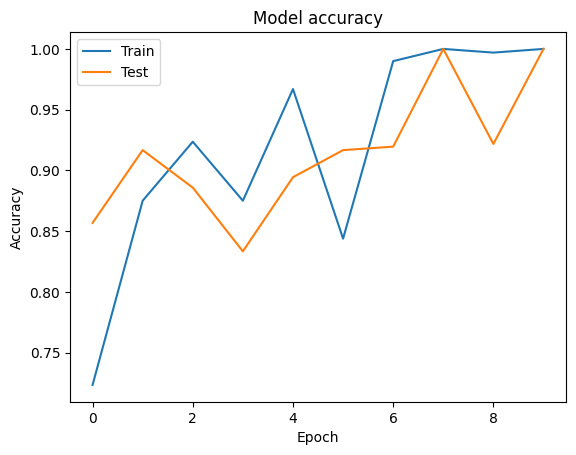

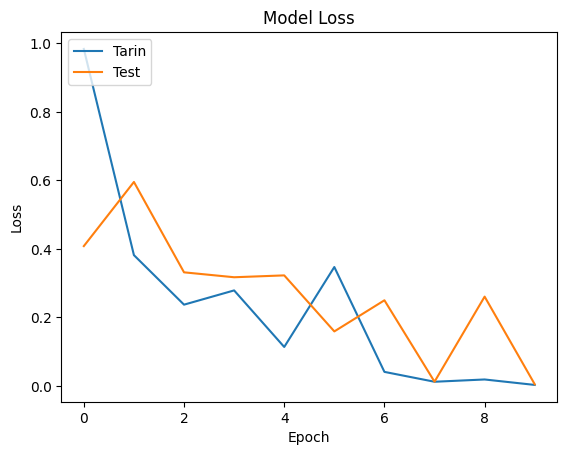

In [22]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plot training and alidation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Tarin', 'Test'], loc='upper left')


**Visual Geometry Group (VGG) Model**

In [23]:
from tensorflow.keras import layers, models

# VGG-like Model Definition
vgg_model = models.Sequential()

# First Block
vgg_model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
vgg_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
vgg_model.add(layers.MaxPooling2D(2, 2))

# Second Block
vgg_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
vgg_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
vgg_model.add(layers.MaxPooling2D(2, 2))

# Third Block
vgg_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
vgg_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
vgg_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
vgg_model.add(layers.MaxPooling2D(2, 2))

# Fourth Block
vgg_model.add(layers.Conv2D(512, (3, 3), activation='relu'))
vgg_model.add(layers.Conv2D(512, (3, 3), activation='relu'))
vgg_model.add(layers.Conv2D(512, (3, 3), activation='relu'))
vgg_model.add(layers.MaxPooling2D(2, 2))

# Fifth Block
vgg_model.add(layers.Conv2D(512, (3, 3), activation='relu'))
vgg_model.add(layers.Conv2D(512, (3, 3), activation='relu'))
vgg_model.add(layers.Conv2D(512, (3, 3), activation='relu'))
vgg_model.add(layers.MaxPooling2D(2, 2))

# Fully Connected Layers
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dense(4096, activation='relu'))
vgg_model.add(layers.Dense(4096, activation='relu'))
vgg_model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


In [24]:
vgg_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 220, 220, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 108, 108, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 106, 106, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 53, 53, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 51, 51, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 49, 49, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 47, 47, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 21, 21, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 19, 19, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 17, 17, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4096)                │       2,101,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 33,638,218 (128.32 MB)

 Trainable params: 33,638,218 (128.32 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Compile the VGG-like Model
vgg_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [26]:
# Define Callbacks
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3,
                                      verbose=1, restore_best_weights=True)
rlronp = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=1,
                                              verbose=1)
callbacks = [es, rlronp]

# Training the VGG-like Model
history = vgg_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
454/454 ━━━━━━━━━━━━━━━━━━━━ 257s 465ms/step - accuracy: 0.2915 - loss: 7.3604 - val_accuracy: 0.2954 - val_loss: 2.1061
Epoch 2/5
454/454 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.2500 - loss: 2.1003 - val_accuracy: 0.2500 - val_loss: 2.1919
Epoch 3/5
454/454 ━━━━━━━━━━━━━━━━━━━━ 237s 402ms/step - accuracy: 0.2989 - loss: 2.0987 - val_accuracy: 0.2951 - val_loss: 2.1014
Epoch 4/5
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 141us/step - accuracy: 0.2500 - loss: 2.0470 - val_accuracy: 0.3333 - val_loss: 2.0855
Epoch 5/5
454/454 ━━━━━━━━━━━━━━━━━━━━ 183s 401ms/step - accuracy: 0.2939 - loss: 2.1072 - val_accuracy: 0.2948 - val_loss: 2.1023


In [27]:
# Model Evaluation
print("Evaluation model...")
val_loss,val_accuracy = vgg_model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

Evaluation model...
113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 102ms/step - accuracy: 0.2994 - loss: 2.1020
Validation accuracy: 29.48%


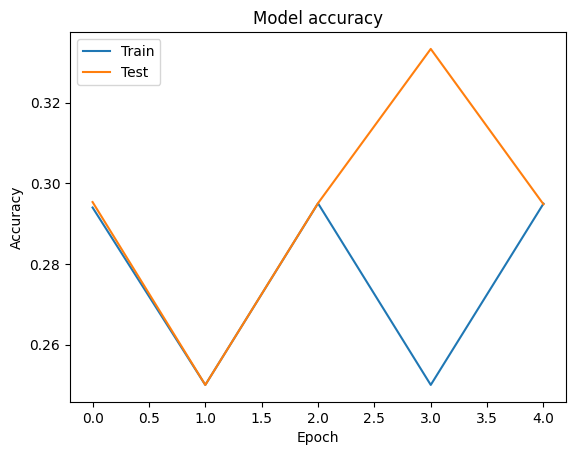

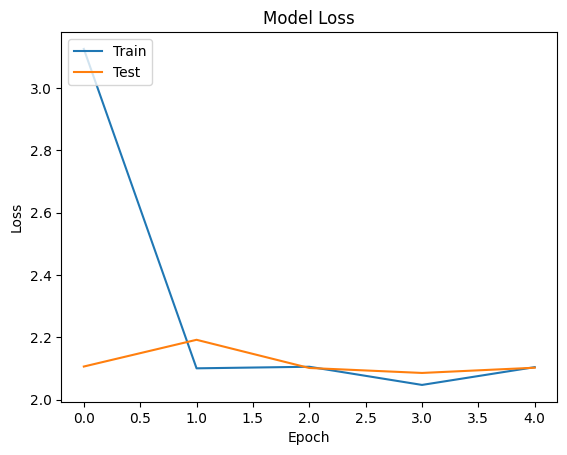

In [28]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plot training and alidation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


**Residual Network (ResNet) Model**

In [29]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

# ResNet Model Definition using ResNet50
resnet_model = ResNet50(weights=None, include_top=False, input_shape=(img_size, img_size, 3))

# Add custom layers on top of ResNet
x = layers.GlobalAveragePooling2D()(resnet_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(train_generator.num_classes, activation='softmax')(x)

# Final ResNet Model
resnet_model = models.Model(inputs=resnet_model.input, outputs=x)


In [30]:
resnet_model.summary()

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,696,138 (98.02 MB)

 Trainable params: 25,643,018 (97.82 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [31]:
# Compile the ResNet Model
resnet_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])


In [32]:
# Define Callbacks
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3,
                                      verbose=1, restore_best_weights=True)
rlronp = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=1,
                                              verbose=1)
callbacks = [es, rlronp]

# Training the ResNet Model
history = resnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
454/454 ━━━━━━━━━━━━━━━━━━━━ 236s 375ms/step - accuracy: 0.4674 - loss: 2.0765 - val_accuracy: 0.3673 - val_loss: 2.2682
Epoch 2/5
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7500 - loss: 0.6957 - val_accuracy: 0.1667 - val_loss: 2.8715
Epoch 3/5
454/454 ━━━━━━━━━━━━━━━━━━━━ 140s 308ms/step - accuracy: 0.7627 - loss: 0.6891 - val_accuracy: 0.1701 - val_loss: 11.1384
Epoch 4/5
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 123us/step - accuracy: 0.7188 - loss: 0.8840 - val_accuracy: 0.0833 - val_loss: 13.2296
Epoch 5/5
454/454 ━━━━━━━━━━━━━━━━━━━━ 141s 308ms/step - accuracy: 0.8336 - loss: 0.4765 - val_accuracy: 0.6554 - val_loss: 1.2934


In [45]:
# Model Evaluation
print("Evaluation model...")
val_loss,val_accuracy = resnet_model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

Evaluation model...
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 0.6618 - loss: 1.2449
Validation accuracy: 65.62%


In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plot training and alidation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Building a Predictive System**

In [36]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the Image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the iamge values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name


In [37]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [38]:
class_indices

{0: 'Tomato___Bacterial_spot',
 1: 'Tomato___Early_blight',
 2: 'Tomato___Late_blight',
 3: 'Tomato___Leaf_Mold',
 4: 'Tomato___Septoria_leaf_spot',
 5: 'Tomato___Spider_mites Two-spotted_spider_mite',
 6: 'Tomato___Target_Spot',
 7: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 8: 'Tomato___Tomato_mosaic_virus',
 9: 'Tomato___healthy'}

In [39]:
# Saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [40]:
# Saving the class names as json file
json.dump(class_indices, open('/content/drive/MyDrive/Trained_Models/class_indices.json', 'w'))

In [47]:
# Example Usage
image_path = '/content/test_tomato-early-blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print(f'Predicted Class Name:', predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class Name: Tomato___Late_blight


**Save the model to Google drive or local**

In [42]:
model.save('/content/drive/MyDrive/Trained_Models/tomatoes_disease_prediction_model.h5')

In [ ]:
from google.colab import files

# Replace 'path_to_your_file' with the actual path to your file in Google Drive
files.download('/content/drive/MyDrive/Trained_Models/tomatoes_disease_prediction_model.h5')


In [44]:
pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.34.2
aiohappyeyeballs                 2.4.0
aiohttp                          3.10.5
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.16
albumentations                   1.4.15
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.19.0
astropy                          6.1.3
astropy-iers-data                0.2024.9.16.0.32.21
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            24.2.0
audioread                        3.0.1
autograd               